In [1]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflo

In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation = "relu", input_dim = 784)) # 128 -> 784/10 or 784/4 
model.add(Dense(10, activation = "softmax"))
model.summary()

W1230 10:06:40.932566 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1230 10:06:40.956506 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1230 10:06:40.960492 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

W1230 10:06:41.007366 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1230 10:06:41.048258 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [4]:
# The reason for normalizing is that the random weights need a fixed input interval.
# Caffe: No normalize , tensorflow: -1~1 or 0~1
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10) # prevent missing some values

In [5]:
# batch_size: number of samples processed before the model is updated
# small picture (100*100): 100~200  
# median picture (300*300): 10~20 、 
# big picture (500*500): 1~5
# epochs: the number of complete passes through the training dataset
# verbose: default is 1 (most logs), here set 2 (essential logs)
# 5 * ((60000 - 6000) / 200) 

model.fit(x_train_norm, y_train_cat,
         batch_size = 200,
         epochs = 15,
         validation_split = 0.1,
         verbose = 2)

# Use the validation set to see whether the val_loss becomes smooth and decide the epochs
# If using train loss to decide epochs, there may be overfitting problems
# Moreover, the train loss may decrease continuously (cannot be smooth)

# If I run the cell again, the learning will inherit last results

W1230 10:06:41.402341 18364 deprecation.py:323] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1230 10:06:41.453174 18364 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4400 - acc: 0.8787 - val_loss: 0.1961 - val_acc: 0.9460
Epoch 2/15
 - 1s - loss: 0.2026 - acc: 0.9424 - val_loss: 0.1394 - val_acc: 0.9608
Epoch 3/15
 - 1s - loss: 0.1493 - acc: 0.9578 - val_loss: 0.1178 - val_acc: 0.9673
Epoch 4/15
 - 1s - loss: 0.1180 - acc: 0.9663 - val_loss: 0.1040 - val_acc: 0.9702
Epoch 5/15
 - 1s - loss: 0.0970 - acc: 0.9725 - val_loss: 0.0944 - val_acc: 0.9735
Epoch 6/15
 - 1s - loss: 0.0806 - acc: 0.9774 - val_loss: 0.0864 - val_acc: 0.9752
Epoch 7/15
 - 1s - loss: 0.0689 - acc: 0.9806 - val_loss: 0.0800 - val_acc: 0.9765
Epoch 8/15
 - 1s - loss: 0.0597 - acc: 0.9831 - val_loss: 0.0787 - val_acc: 0.9770
Epoch 9/15
 - 1s - loss: 0.0522 - acc: 0.9854 - val_loss: 0.0754 - val_acc: 0.9793
Epoch 10/15
 - 1s - loss: 0.0458 - acc: 0.9869 - val_loss: 0.0737 - val_acc: 0.9777
Epoch 11/15
 - 1s - loss: 0.0393 - acc: 0.9893 - val_loss: 0.0722 - val_acc: 0.9798
Epoch 12/15
 - 1s - loss: 0.0338 - a

In [6]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 22us/step


[0.07300256683968473, 0.978]

In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
i = ["{}(真實)".format(i) for i in range(10)]
c = ["{}(預測)".format(i) for i in range(10)]

percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r)*100 ,2)) for n in r])

pd.DataFrame(percents, index = i, columns = c)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),98.37%,0.0%,0.2%,0.1%,0.1%,0.2%,0.41%,0.1%,0.1%,0.41%
1(真實),0.0%,99.12%,0.18%,0.09%,0.0%,0.09%,0.18%,0.09%,0.26%,0.0%
2(真實),0.0%,0.1%,97.48%,0.39%,0.1%,0.1%,0.29%,0.58%,0.97%,0.0%
3(真實),0.0%,0.0%,0.4%,97.72%,0.0%,0.3%,0.2%,0.5%,0.3%,0.59%
4(真實),0.0%,0.0%,0.31%,0.0%,97.76%,0.0%,0.41%,0.2%,0.0%,1.32%
5(真實),0.22%,0.11%,0.0%,0.9%,0.11%,97.2%,0.45%,0.11%,0.56%,0.34%
6(真實),0.21%,0.31%,0.21%,0.1%,0.31%,0.52%,98.12%,0.0%,0.21%,0.0%
7(真實),0.0%,0.49%,0.68%,0.19%,0.0%,0.0%,0.0%,97.86%,0.19%,0.58%
8(真實),0.21%,0.21%,0.41%,0.62%,0.41%,0.31%,0.1%,0.41%,96.92%,0.41%
9(真實),0.0%,0.5%,0.0%,0.79%,0.69%,0.2%,0.1%,0.5%,0.0%,97.22%


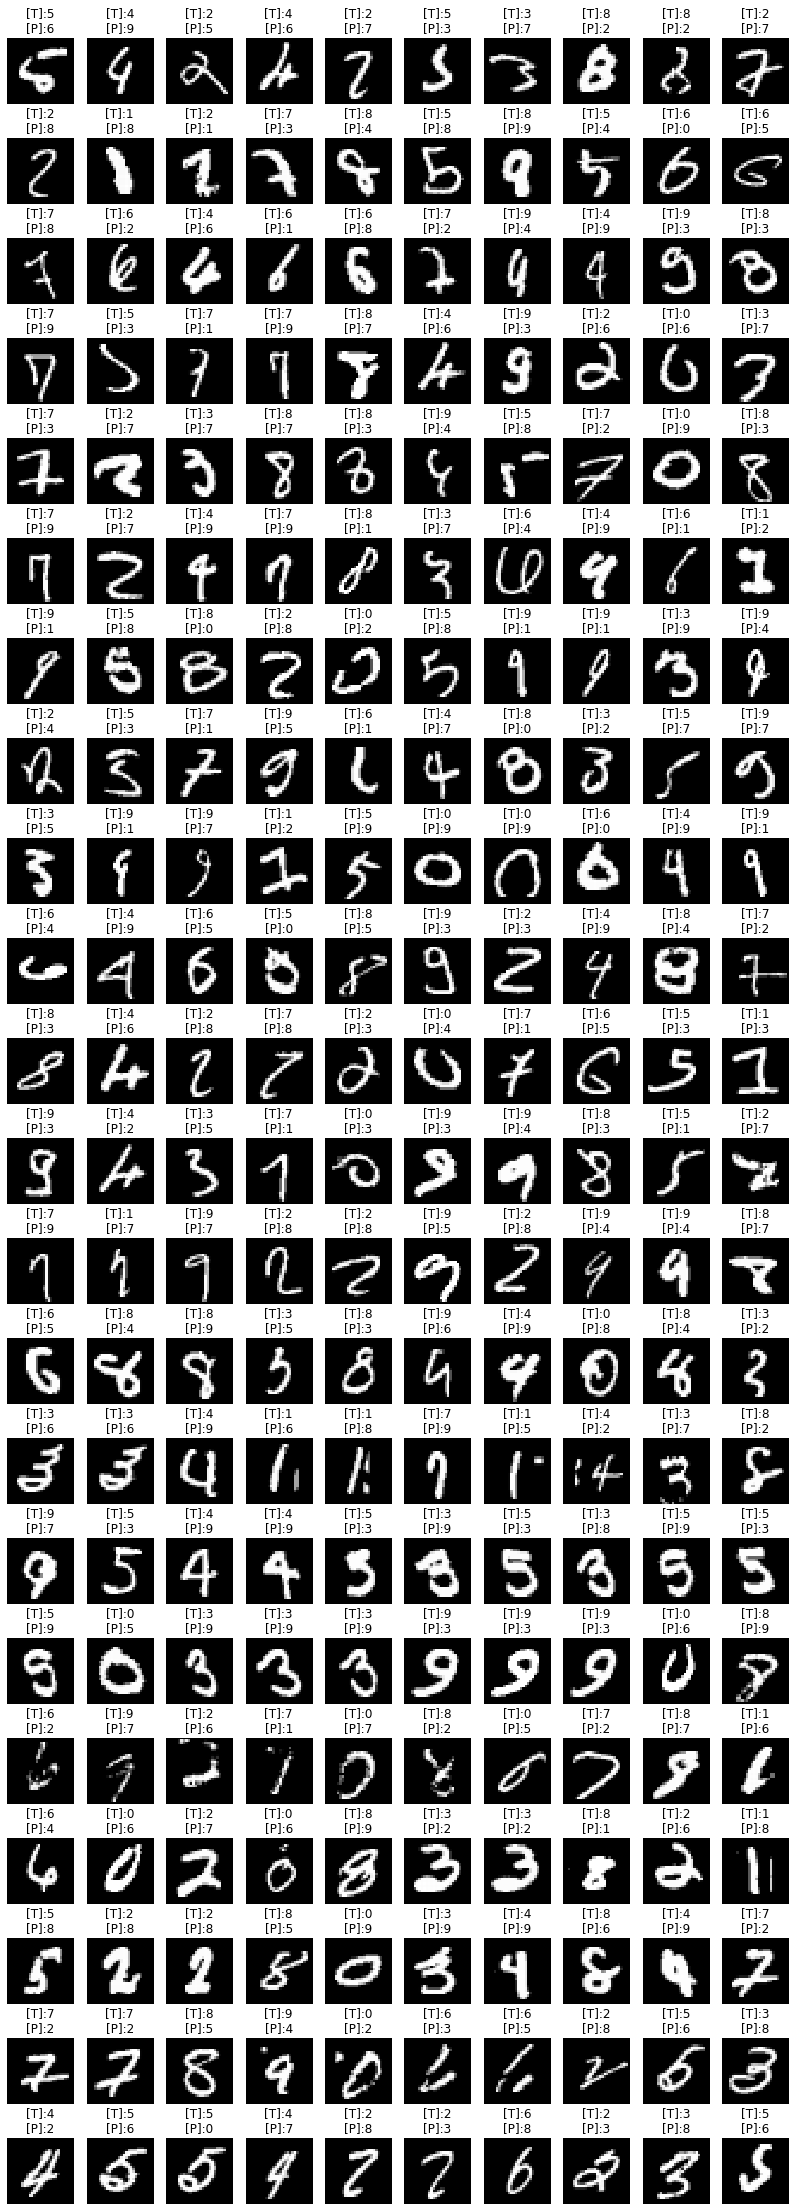

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

idx = np.nonzero(pre != y_test)[0]
pre_false_img = x_test[idx]
pre_false_label = y_test[idx] 
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize = (14, 42))

z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))

for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[T]:{}\n[P]:{}".format(label, p))
    plt.axis("off")
    result = plt.imshow(img, cmap = "gray")

result

In [31]:
model.save("mlp.h5")
# can use HDFView to see the model structures and parameters

In [33]:
from keras.models import load_model
temp = load_model("mlp.h5")

temp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 29us/step


[0.07300256683968473, 0.978]

輸入檔名：test_5.png


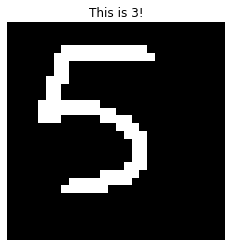

In [42]:
# Pillow
from keras.preprocessing.image import load_img
fn = input("輸入檔名：")
# img = load_img(fn, target_size = (28, 28)).convert("L")
# print(img)
img = np.array(load_img(fn, target_size = (28, 28)).convert("L"))

# taget size will Scale the picture proportionally
img_np = img.reshape(-1, 784) / 255
pre_test = model.predict_classes(img_np)[0]
title = "This is {}!".format(pre_test)

plt.title(title)
plt.axis("off")
plt.imshow(img, cmap = "gray")